# Dumb Machine Learning on Recruiting Data

This notebook is runs random ML models on a sample size of 18 to find out which variables are best for predicting output. 

DISCLAIMER: This data is all entirely made up and is not proprietary information whatsoever. Any similaraties to internal recruiting data is purely coincidentatal plz dont sue me :)


## Importing Packages

In [1]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Data Cleaning/Preprocessing

In [2]:
csv_file_path = 'Data/data.csv'

df = pd.read_csv(csv_file_path)

display(df.head(5))

,Data Structures and Algorithms,Coding,Structured Problem Solving,Commerciality,Communication,Recommendation
0,2,3,4,4.0,5.0,No
1,3,2,3,NaN,4.0,Yes
2,1,1,1,1.0,1.0,No
3,3,4,3,4.0,3.0,Yes
4,3,3,2,4.0,3.0,Yes


Clearly there is work to be done. Lets first find out the number of NaN values so we know what to do with them

In [3]:
df.isna().sum()

Data Structures and Algorithms    0
Coding                            0
Structured Problem Solving        0
Commerciality                     6
Communication                     1
Recommendation                    0
dtype: int64

Clearly, the "Commerciality" column is not very useful since 33% of the values are NaN. Furthermore, what even is the Commerciality of a student? This column should be dropped. For the other NaN value, lets just set it to 1.

In [4]:
df = df.drop('Commerciality', axis=1)
df['Communication'].fillna(1, inplace=True)
display(df.head(5))

,Data Structures and Algorithms,Coding,Structured Problem Solving,Communication,Recommendation
0,2,3,4,5.0,No
1,3,2,3,4.0,Yes
2,1,1,1,1.0,No
3,3,4,3,3.0,Yes
4,3,3,2,3.0,Yes


In [5]:
#convert Communication Column from Type Float to Int 
df['Communication'] = df['Communication'].astype('int')

Finally, we will convert the Recommendation column's values from Yes and No to 1 and 0, respectively. Once this is complete, we can start graphing out some of the columns to see if there is any interesting deviations in the data.

In [6]:
df['Recommendation'] = df['Recommendation'].map({'Yes': 1, 'No': 0})
df_no = df.loc[df['Recommendation'] == 0]
df_yes = df.loc[df['Recommendation'] == 1]

display(df.head(5))

,Data Structures and Algorithms,Coding,Structured Problem Solving,Communication,Recommendation
0,2,3,4,5,0
1,3,2,3,4,1
2,1,1,1,1,0
3,3,4,3,3,1
4,3,3,2,3,1


## Graphing Data Distribution

In [7]:
import matplotlib.pyplot as plt

### Data Structures & Algorithms

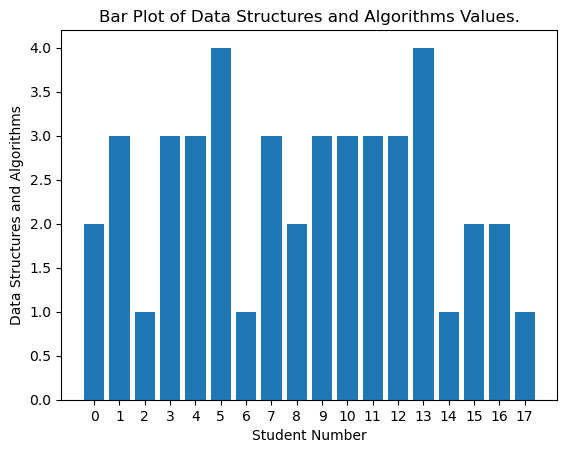

In [8]:
# Get the column to plot
column_to_plot = 'Data Structures and Algorithms'

# Create a bar plot of the column
plt.bar(df.index, df[column_to_plot])
plt.xticks(df.index)
plt.xlabel('Student Number')
plt.ylabel(column_to_plot)
plt.title('Bar Plot of ' + column_to_plot + ' Values.')
plt.show()

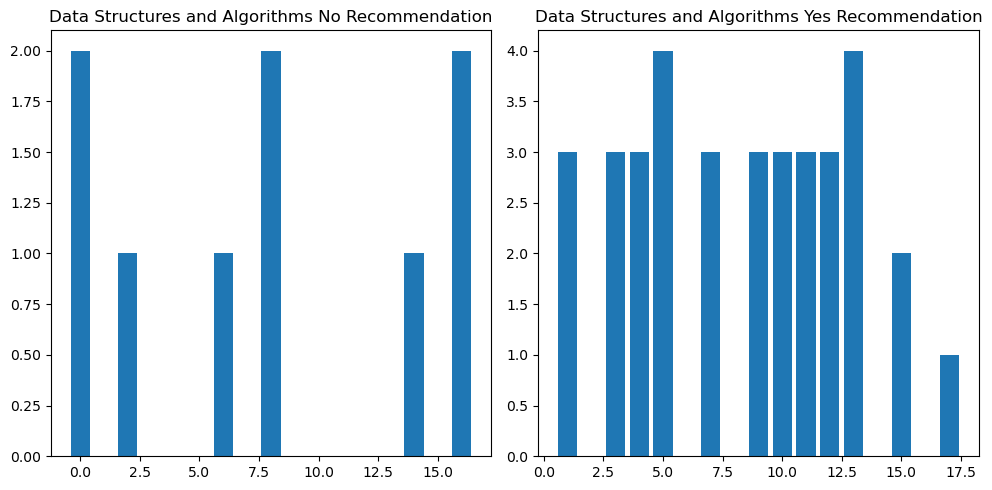

In [9]:
column_to_plot = 'Data Structures and Algorithms'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
ax1.bar(df_no.index, df_no[column_to_plot], label='No Recommendation')
ax1.set_title(column_to_plot + ' No Recommendation')

# Plot the second bar plot
ax2.bar(df_yes.index, df_yes[column_to_plot], label='Yes Recommendation')
ax2.set_title(column_to_plot + ' Yes Recommendation')

# Show the plots
plt.tight_layout()
plt.show()

It seems like the vast majority of the students with a Yes recommendation had a Data Structures and Algorithms score higher than a 3.

### Coding

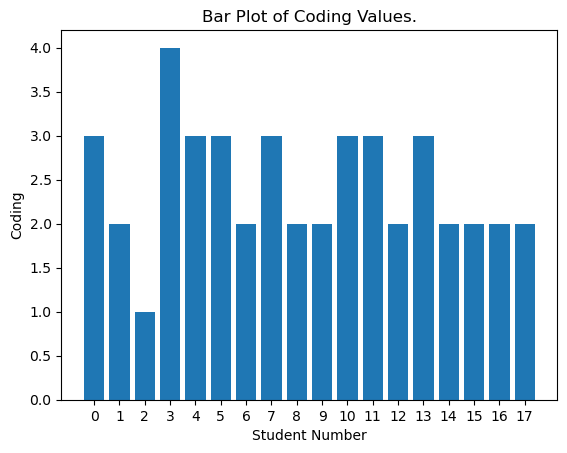

In [10]:
# Get the column to plot
column_to_plot = 'Coding'

# Create a bar plot of the column
plt.bar(df.index, df[column_to_plot])
plt.xticks(df.index)
plt.xlabel('Student Number')
plt.ylabel(column_to_plot)
plt.title('Bar Plot of ' + column_to_plot + ' Values.')
plt.show()

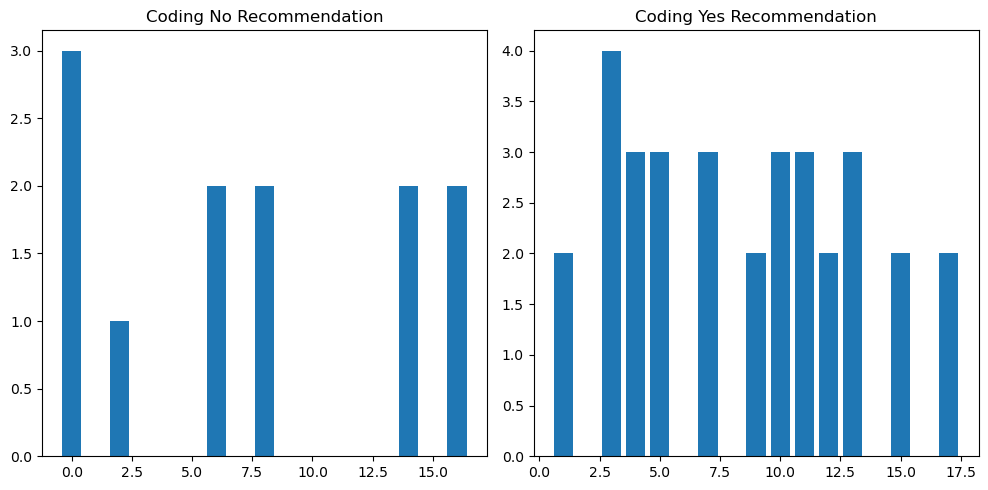

In [11]:
column_to_plot = 'Coding'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
ax1.bar(df_no.index, df_no[column_to_plot], label='No Recommendation')
ax1.set_title(column_to_plot + ' No Recommendation')

# Plot the second bar plot
ax2.bar(df_yes.index, df_yes[column_to_plot], label='Yes Recommendation')
ax2.set_title(column_to_plot + ' Yes Recommendation')

# Show the plots
plt.tight_layout()
plt.show()

Its hard to find an obvious pattern for the coding variable, but it seems like getting a 3 in this category almost always gets a yes, but getting a 2 does not necessarily disqualify you from getting a yes recommendation

### Structured Problem Solving

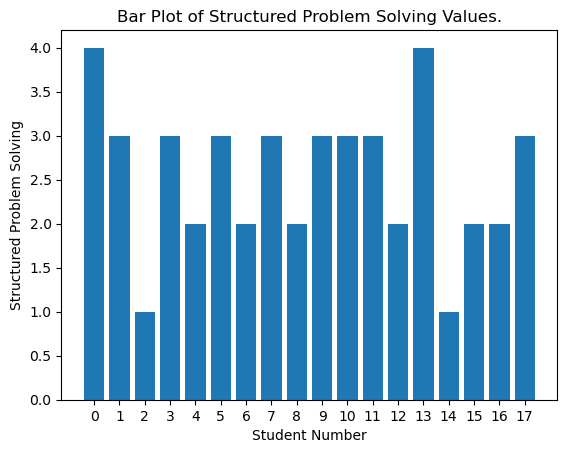

In [12]:
# Get the column to plot
column_to_plot = 'Structured Problem Solving'

# Create a bar plot of the column
plt.bar(df.index, df[column_to_plot])
plt.xticks(df.index)
plt.xlabel('Student Number')
plt.ylabel(column_to_plot)
plt.title('Bar Plot of ' + column_to_plot + ' Values.')
plt.show()

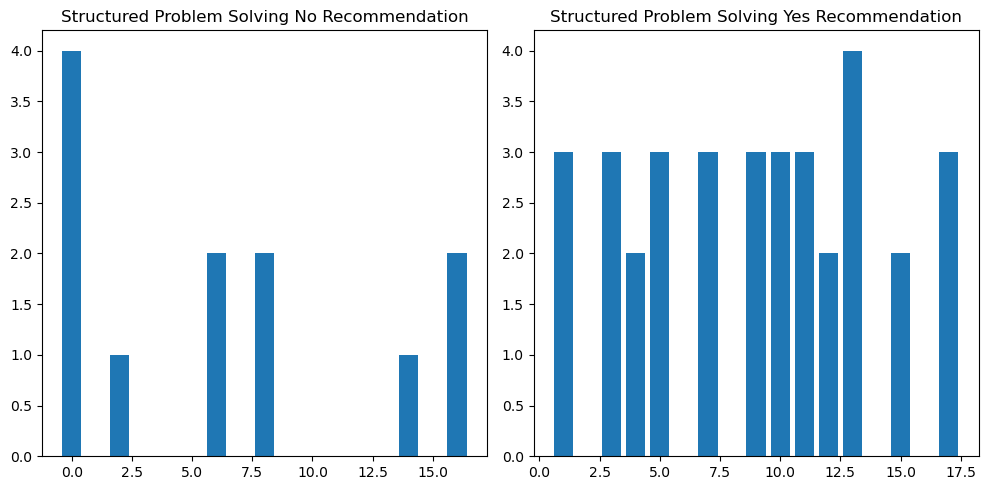

In [13]:
column_to_plot = 'Structured Problem Solving'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
ax1.bar(df_no.index, df_no[column_to_plot], label='No Recommendation')
ax1.set_title(column_to_plot + ' No Recommendation')

# Plot the second bar plot
ax2.bar(df_yes.index, df_yes[column_to_plot], label='Yes Recommendation')
ax2.set_title(column_to_plot + ' Yes Recommendation')

# Show the plots
plt.tight_layout()
plt.show()

This column is also very strange. It seems like getting a 3 or above will almost always give you a 'yes' recommendation, but with one outlier, where a student with a 4 got a no recommendation.

### Communication

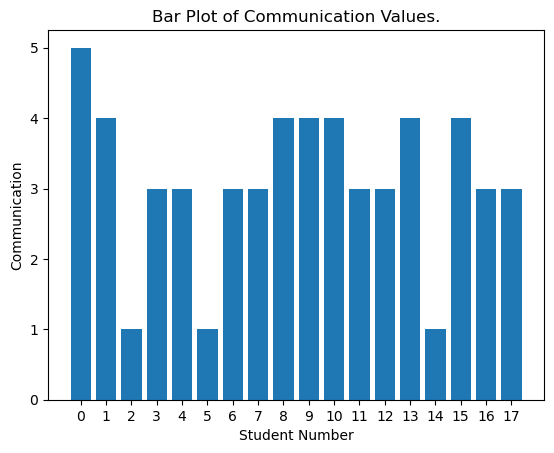

In [14]:
# Get the column to plot
column_to_plot = 'Communication'

# Create a bar plot of the column
plt.bar(df.index, df[column_to_plot])
plt.xticks(df.index)
plt.xlabel('Student Number')
plt.ylabel(column_to_plot)
plt.title('Bar Plot of ' + column_to_plot + ' Values.')
plt.show()

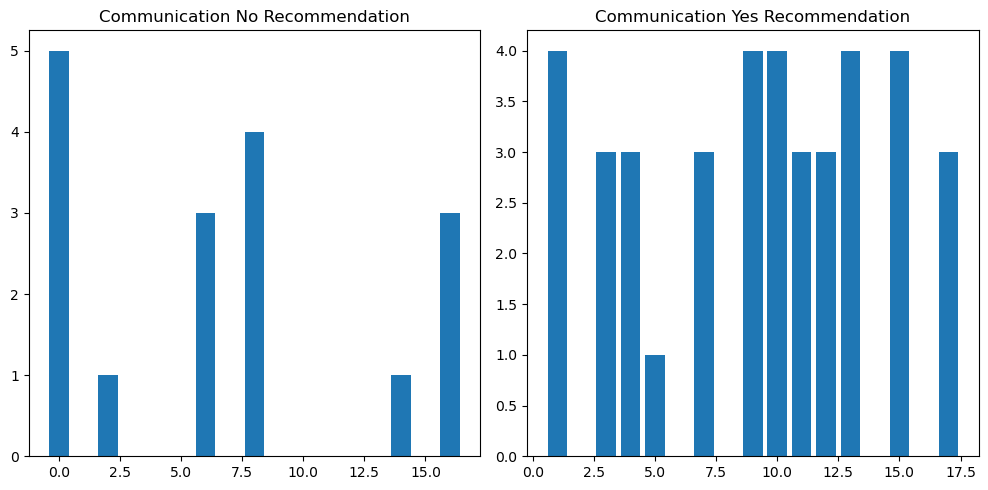

In [15]:
column_to_plot = 'Communication'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
ax1.bar(df_no.index, df_no[column_to_plot], label='No Recommendation')
ax1.set_title(column_to_plot + ' No Recommendation')

# Plot the second bar plot
ax2.bar(df_yes.index, df_yes[column_to_plot], label='Yes Recommendation')
ax2.set_title(column_to_plot + ' Yes Recommendation')

# Show the plots
plt.tight_layout()
plt.show()

There doesn't seem to be any interesting trends that come from communication. It might not be the most ueseful predictor alone. Anywayyy time to run some ML models!

## Linear Regression

Why run a linear regression on an output with only 2 values? Because I'm bored and want to see how terrible it will be

In [16]:
_x = ['Data Structures and Algorithms','Coding','Structured Problem Solving','Communication']
_y = ['Recommendation']

In [17]:
linear_model = LinearRegression()
linear_model.fit(df[_x], df['Recommendation'])

LinearRegression()

In [18]:
y_pred = linear_model.predict(df[_x])
print(y_pred)

[0.58841772 0.86689873 0.14544304 0.85718354 0.80563291 1.20759494
 0.17629747 0.86721519 0.48563291 0.86689873 0.85686709 0.86721519
 0.81566456 1.23813291 0.13541139 0.48563291 0.49598101 0.23787975]


Okay so the accuracy is close to zero, but lets see which variables it thinks are the most important and how much weight it placed on each one.

In [19]:
# Print the coefficients
print(linear_model.coef_)
print(linear_model.intercept_)

[ 0.31968354 -0.01003165  0.06158228 -0.0103481 ]
-0.21544303797468356


Okay, so according to the linear regression, "Data Structures and Algorithms" is by far the most important predictor, followed by "Structured Problem Solving". Now lets try a logisitic regression

## Logistic Regression